In [50]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [51]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [52]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [53]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=True)


In [54]:
# reflect an existing database into a new model
Base = automap_base()

Base.prepare(engine, reflect=True)

# reflect the tables


2023-10-08 11:16:14,671 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2023-10-08 11:16:14,672 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-10-08 11:16:14,678 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("measurement")
2023-10-08 11:16:14,679 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-10-08 11:16:14,681 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-10-08 11:16:14,682 INFO sqlalchemy.engine.Engine [raw sql] ('measurement',)
2023-10-08 11:16:14,683 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("measurement")
2023-10-08 11:16:14,684 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-10-08 11:16:14,684 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("measurement")
2023-10-08 11:16:14,685 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-10-08 11:16:14,686 INFO sqlalchemy.engine.Engine SELECT sql

In [55]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [56]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station

In [57]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [58]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

2023-10-08 11:16:17,378 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-10-08 11:16:17,383 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date 
FROM measurement ORDER BY measurement.date DESC
 LIMIT ? OFFSET ?
2023-10-08 11:16:17,384 INFO sqlalchemy.engine.Engine [generated in 0.00127s] (1, 0)


('2017-08-23',)

2023-10-08 11:16:17,911 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ?
2023-10-08 11:16:17,913 INFO sqlalchemy.engine.Engine [generated in 0.00252s] ('2016-08-23',)


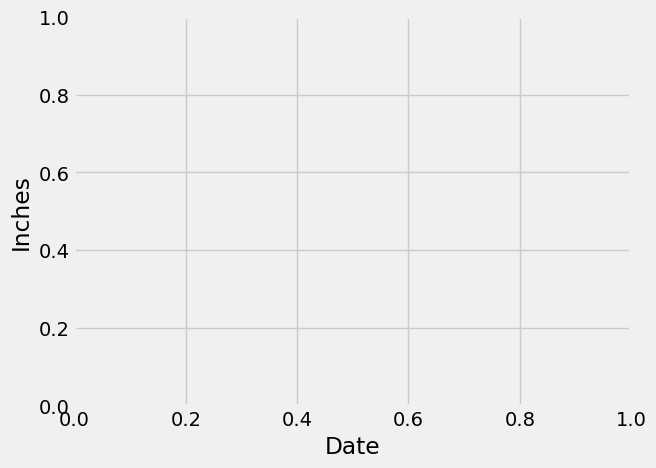

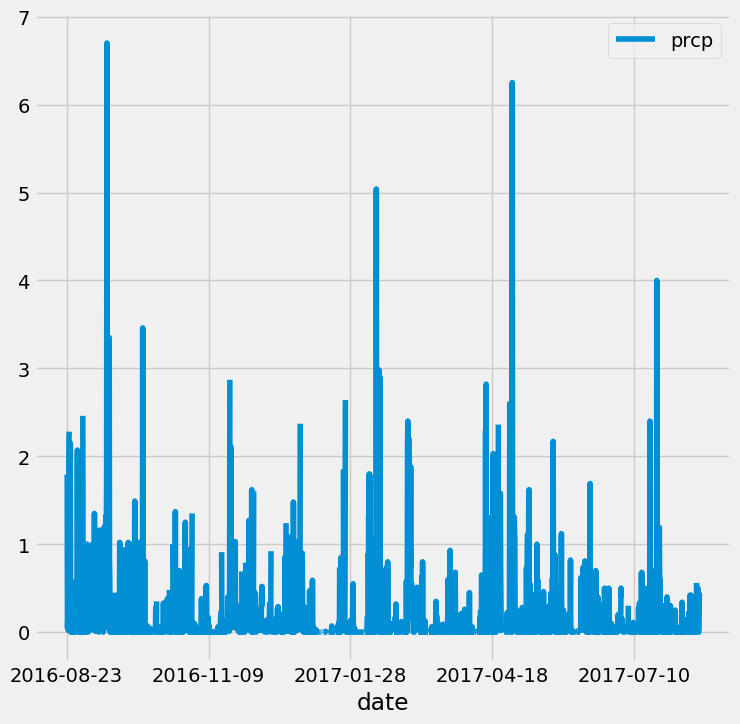

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(measurement.date, measurement.prcp).\
                           filter(measurement.date >= year_ago).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names

weather_df = pd.DataFrame(prcp_query, columns=["date", "prcp"])

                      
# Sort the dataframe by date

weather_df = weather_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data

plt.xlabel("Date")
plt.ylabel("Inches")

weather_df.plot(figsize=(8,8), x = "date", y = "prcp")

plt.show()

In [60]:
dict(zip(weather_df["date"],weather_df["prcp"]))

{'2016-08-23': 0.02,
 '2016-08-24': 2.15,
 '2016-08-25': 0.08,
 '2016-08-26': 0.0,
 '2016-08-27': nan,
 '2016-08-28': 2.07,
 '2016-08-29': 0.35,
 '2016-08-30': 0.0,
 '2016-08-31': 0.25,
 '2016-09-01': 0.0,
 '2016-09-02': 0.19,
 '2016-09-03': 0.07,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 0.04,
 '2016-09-07': 0.23,
 '2016-09-08': 0.0,
 '2016-09-09': 0.16,
 '2016-09-10': 0.09,
 '2016-09-11': 0.6,
 '2016-09-12': 0.15,
 '2016-09-13': 0.37,
 '2016-09-14': nan,
 '2016-09-15': 0.83,
 '2016-09-16': 0.01,
 '2016-09-17': 0.05,
 '2016-09-18': 0.0,
 '2016-09-19': nan,
 '2016-09-20': 0.43,
 '2016-09-21': 0.0,
 '2016-09-22': 0.02,
 '2016-09-23': 0.0,
 '2016-09-24': 0.01,
 '2016-09-25': 0.04,
 '2016-09-26': nan,
 '2016-09-27': 0.02,
 '2016-09-28': 0.0,
 '2016-09-29': 0.18,
 '2016-09-30': 0.15,
 '2016-10-01': 1.02,
 '2016-10-02': 0.0,
 '2016-10-03': 0.0,
 '2016-10-04': 0.0,
 '2016-10-05': 0.0,
 '2016-10-06': 0.0,
 '2016-10-07': 0.0,
 '2016-10-08': 0.0,
 '2016-10-09': 0.0,
 '2016-10-10'

In [61]:
# Use Pandas to calculate the summary statistics for the precipitation data
weather_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number of stations in the dataset
ttl_stations = session.query(func.count(station.station)).all()
ttl_stations

2023-10-08 11:16:24,976 INFO sqlalchemy.engine.Engine SELECT count(station.station) AS count_1 
FROM station
2023-10-08 11:16:24,979 INFO sqlalchemy.engine.Engine [generated in 0.00285s] ()


[(9,)]

In [63]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station))\
.group_by(measurement.station)\
.order_by(func.count(measurement.station).desc())\
.all()

active_station



2023-10-08 11:16:25,526 INFO sqlalchemy.engine.Engine SELECT measurement.station AS measurement_station, count(measurement.station) AS count_1 
FROM measurement GROUP BY measurement.station ORDER BY count(measurement.station) DESC
2023-10-08 11:16:25,528 INFO sqlalchemy.engine.Engine [generated in 0.00230s] ()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
dict(zip(ttl_stations, ["station"]))

{(9,): 'station'}

In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
avg_active_station = session.query(func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

avg_active_station
# active_station.min()
# max_active_station =session.query(measurement.station, func.min)
min_active_station = session.query(func.min(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

min_active_station


# active_station.max()
# min_active_station = 
max_active_station = session.query(func.max(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

max_active_station



2023-10-08 11:16:26,086 INFO sqlalchemy.engine.Engine SELECT avg(measurement.tobs) AS avg_1 
FROM measurement 
WHERE measurement.station = ?
2023-10-08 11:16:26,088 INFO sqlalchemy.engine.Engine [generated in 0.00205s] ('USC00519281',)
2023-10-08 11:16:26,095 INFO sqlalchemy.engine.Engine SELECT min(measurement.tobs) AS min_1 
FROM measurement 
WHERE measurement.station = ?
2023-10-08 11:16:26,096 INFO sqlalchemy.engine.Engine [generated in 0.00105s] ('USC00519281',)
2023-10-08 11:16:26,101 INFO sqlalchemy.engine.Engine SELECT max(measurement.tobs) AS max_1 
FROM measurement 
WHERE measurement.station = ?
2023-10-08 11:16:26,102 INFO sqlalchemy.engine.Engine [generated in 0.00091s] ('USC00519281',)


[(85.0,)]

2023-10-08 11:16:26,945 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date >= ? AND measurement.station = ?
2023-10-08 11:16:26,946 INFO sqlalchemy.engine.Engine [generated in 0.00129s] ('2016-08-23', 'USC00519281')


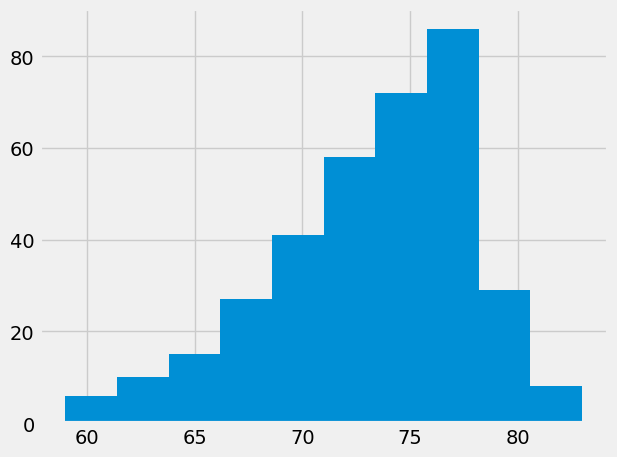

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_temp = session.query(measurement.date, measurement.tobs).\
                             filter(measurement.date >= year_ago).filter(measurement.station == "USC00519281").all()


observation_data_df = pd.DataFrame(station_temp, columns=["date", "tobs"])
observation_data_df = observation_data_df.sort_values("date")
plt.hist(observation_data_df["tobs"])
plt.tight_layout()
plt.show()






In [66]:
dict(zip(observation_data_df["date"],observation_data_df["tobs"]))

{'2016-08-23': 77.0,
 '2016-08-24': 77.0,
 '2016-08-25': 80.0,
 '2016-08-26': 80.0,
 '2016-08-27': 75.0,
 '2016-08-28': 73.0,
 '2016-08-29': 78.0,
 '2016-08-30': 77.0,
 '2016-08-31': 78.0,
 '2016-09-01': 80.0,
 '2016-09-02': 80.0,
 '2016-09-03': 78.0,
 '2016-09-04': 78.0,
 '2016-09-05': 78.0,
 '2016-09-06': 73.0,
 '2016-09-07': 74.0,
 '2016-09-08': 80.0,
 '2016-09-09': 79.0,
 '2016-09-10': 77.0,
 '2016-09-11': 80.0,
 '2016-09-12': 76.0,
 '2016-09-13': 79.0,
 '2016-09-14': 75.0,
 '2016-09-15': 79.0,
 '2016-09-16': 78.0,
 '2016-09-17': 79.0,
 '2016-09-18': 78.0,
 '2016-09-19': 78.0,
 '2016-09-20': 76.0,
 '2016-09-21': 74.0,
 '2016-09-22': 77.0,
 '2016-09-23': 78.0,
 '2016-09-24': 79.0,
 '2016-09-25': 79.0,
 '2016-09-26': 77.0,
 '2016-09-27': 80.0,
 '2016-09-28': 78.0,
 '2016-09-29': 78.0,
 '2016-09-30': 78.0,
 '2016-10-01': 77.0,
 '2016-10-02': 79.0,
 '2016-10-03': 79.0,
 '2016-10-04': 79.0,
 '2016-10-05': 79.0,
 '2016-10-06': 75.0,
 '2016-10-07': 76.0,
 '2016-10-08': 73.0,
 '2016-10-09'

# Close Session

In [67]:
# Close Session
session.close()

2023-10-08 11:16:59,408 INFO sqlalchemy.engine.Engine ROLLBACK
